<a href="https://colab.research.google.com/github/abhinavftp98/projects/blob/main/Sugarcanedisea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2
import os
import seaborn as sns
import random
import pandas as pd


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
paths = os.listdir('/content/drive/MyDrive/ganna')

In [ ]:
paths

['RedRust', 'BacterialBlight', 'Healthy', 'RedRot']

In [ ]:
import pathlib
data_dir = '/content/drive/MyDrive/ganna'
data_dir = pathlib.Path(data_dir)

In [ ]:
import glob

image_files = list(data_dir.glob('*/*'))

image_count = len(image_files)
print(image_count)


2099


In [ ]:
from PIL import Image

Bacterial_Blight = list(data_dir.glob('RedRust/*'))
image_path = str(Bacterial_Blight[0])

# Open the image
image = Image.open(image_path)

# Resize the image to a smaller size
new_size = (250, 250)  # Specify the desired size
resized_image = image.resize(new_size)

# Display the resized image
resized_image.show()


In [ ]:
Bacterial_Blight = list(data_dir.glob('BacterialBlight/*'))
image_path = str(Bacterial_Blight[0])

# Open the image
image = Image.open(image_path)

# Resize the image to a smaller size
new_size = (250, 250)  # Specify the desired size
resized_image = image.resize(new_size)

# Display the resized image
resized_image.show()


In [ ]:
Bacterial_Blight = list(data_dir.glob('Healthy/*'))
image_path = str(Bacterial_Blight[0])

# Open the image
image = Image.open(image_path)

# Resize the image to a smaller size
new_size = (250, 250)  # Specify the desired size
resized_image = image.resize(new_size)

# Display the resized image
resized_image.show()


In [ ]:
red_rot = list(data_dir.glob('RedRot/*'))
image_path = str(red_rot[0])

# Open the image
image = Image.open(image_path)

# Resize the image to a smaller size
new_size = (250, 250)  # Specify the desired size
resized_image = image.resize(new_size)

# Display the resized image
resized_image.show()


preprocess data using Data Generator

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
class_labels = os.listdir(data_dir)

X = []
y = []

for class_label in class_labels:
    class_dir = os.path.join(data_dir, class_label)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (180, 180))
        resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        X.append(resized_img_rgb)
        y.append(class_label)

X = np.array(X)
y = np.array(y)

print(X.shape)  # Shape of input images array
print(y.shape)  # Shape of class labels array


(2099, 180, 180, 3)
(2099,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Get the mapping of label encoder
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Print the label-value mapping
for label, value in label_mapping.items():
    print("Label: {}, Value: {}".format(label, value))

Label: 0, Value: BacterialBlight
Label: 1, Value: Healthy
Label: 2, Value: RedRot
Label: 3, Value: RedRust


In [ ]:
np.unique(y)

array([0, 1, 2, 3])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=23)

# Print the shape of each dataset
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (1462, 180, 180, 3) (1462,)
Validation set shape: (322, 180, 180, 3) (322,)
Test set shape: (315, 180, 180, 3) (315,)


visualizing the data

Number of training examples: 1462
Number of testing examples: 315
Number of validation examples: 322
Each image is of size: 180


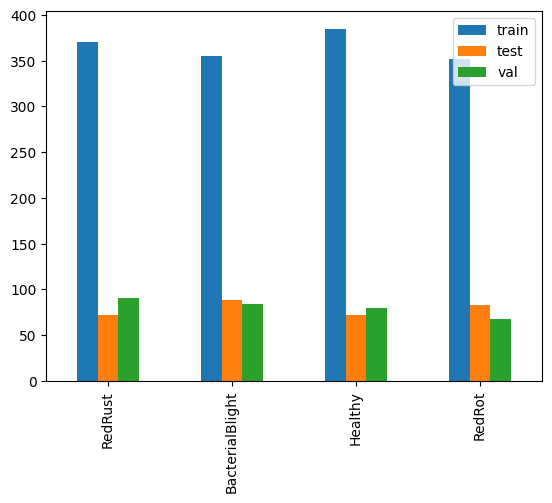

In [ ]:
n_train = y_train.shape[0]
n_test = y_test.shape[0]
n_val = y_val.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Number of validation examples: {}".format(n_val))
print("Each image is of size: {}".format(180, 180))

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
_, val_counts = np.unique(y_val, return_counts=True)

df = pd.DataFrame({'train': train_counts, 'test': test_counts, 'val': val_counts}, index=paths)
df.plot.bar()
plt.show()


In [ ]:
class_names = sorted(set(y_train))
print(class_names)


[0, 1, 2, 3]


Visualise the data

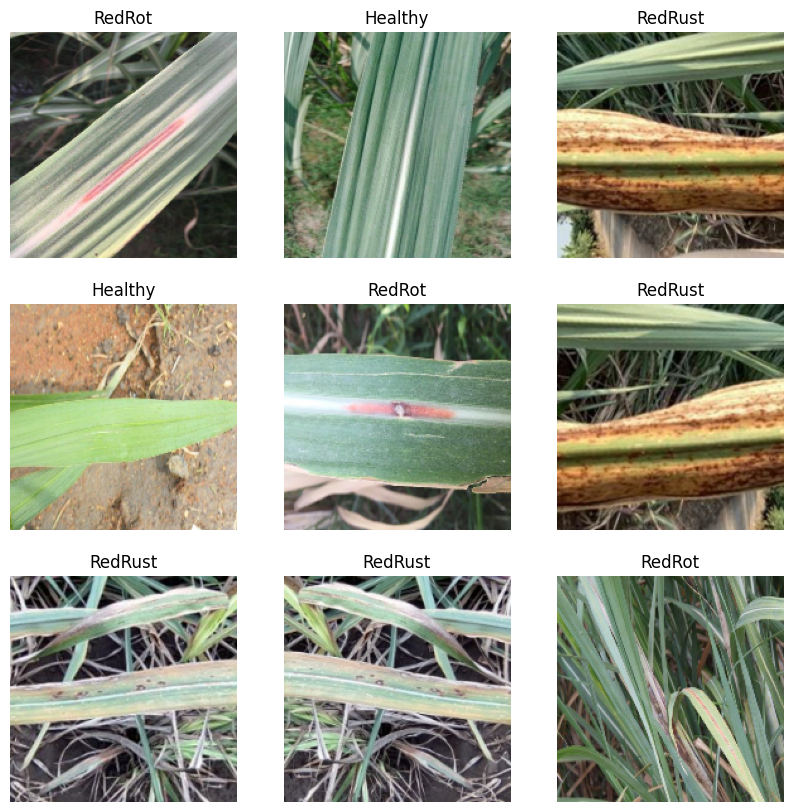

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].astype("uint8"))

    # Get the original label using the label_mapping dictionary
    original_label = label_mapping[y_train[i]]

    plt.title(original_label)  # Use the original label in the title
    plt.axis("off")

plt.show()


In [ ]:
print("Training set:")
print(X_train.shape)
print(y_train.shape)


Training set:
(1462, 180, 180, 3)
(1462,)


Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Standardize the dataset

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.08235294 0.9215687


Create the model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train the model

In [ ]:
epochs=50

history = model.fit(
  X_train,
  y_train,
  validation_data=(X_val, y_val),
  epochs=epochs,
  batch_size=batch_size
)


Epoch 1/50
46/46 [==============================] - 13s 32ms/step - loss: 1.4226 - accuracy: 0.3242 - val_loss: 1.1658 - val_accuracy: 0.4441
Epoch 2/50
46/46 [==============================] - 1s 18ms/step - loss: 0.8667 - accuracy: 0.6402 - val_loss: 0.7706 - val_accuracy: 0.6925
Epoch 3/50
46/46 [==============================] - 1s 18ms/step - loss: 0.4911 - accuracy: 0.8181 - val_loss: 0.9619 - val_accuracy: 0.6988
Epoch 4/50
46/46 [==============================] - 1s 18ms/step - loss: 0.5189 - accuracy: 0.8010 - val_loss: 0.5119 - val_accuracy: 0.7981
Epoch 5/50
46/46 [==============================] - 1s 18ms/step - loss: 0.3601 - accuracy: 0.8694 - val_loss: 0.5191 - val_accuracy: 0.8416
Epoch 6/50
46/46 [==============================] - 1s 18ms/step - loss: 0.2046 - accuracy: 0.9268 - val_loss: 0.4917 - val_accuracy: 0.8354
Epoch 7/50
46/46 [==============================] - 1s 20ms/step - loss: 0.1285 - accuracy: 0.9576 - val_loss: 0.5915 - val_accuracy: 0.7950
Epoch 8/50
4

Visualize training results

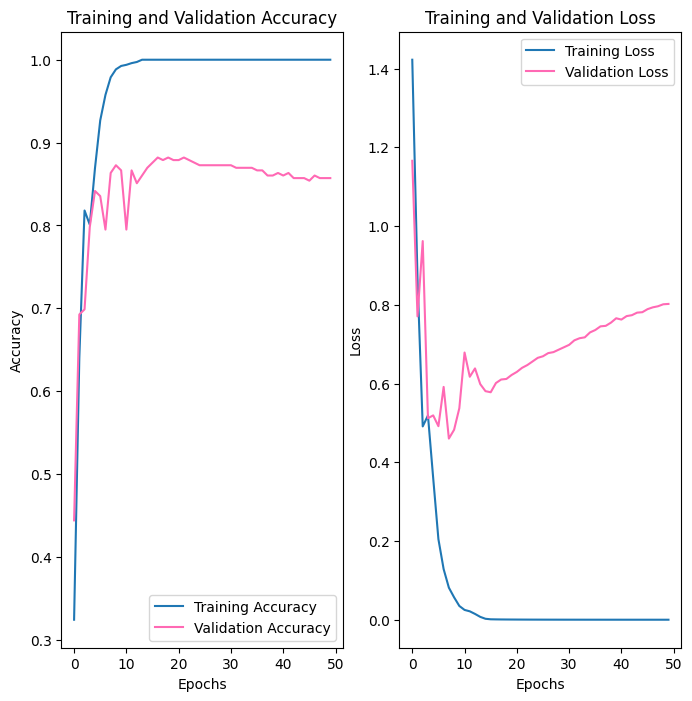

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='hotpink')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='hotpink')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Data Augumentation

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

10/10 [==============================] - 0s 32ms/step


0.8825396825396825

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

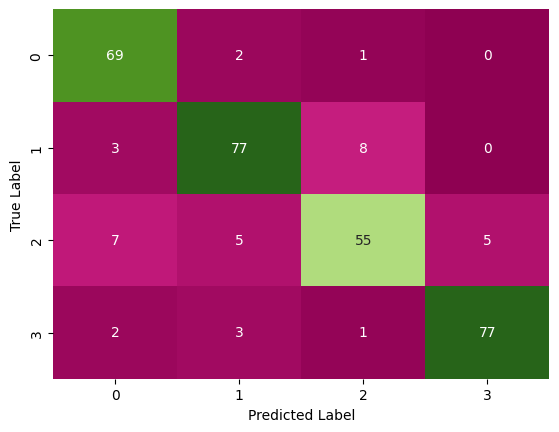

In [ ]:
# Create the confusion matrix heatmap
ax = sns.heatmap(cm, annot=True, cmap='PiYG', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Remove the colorbar
ax.collections[0].colorbar.remove()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1_score = f1_score(y_test, y_pred, average='weighted')
precision,recall,f1_score

(0.8827952130727572, 0.8825396825396825, 0.8814541654455781)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.GaussianNoise(0.2),
  ]
)

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)
  plt.axis("off")
  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)
  plt.axis("off")

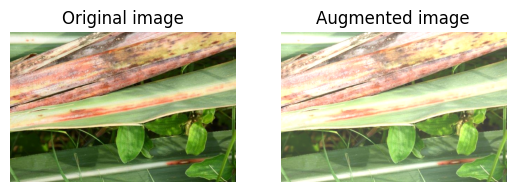

In [ ]:
bright = tf.image.adjust_brightness(image, 0.2)
visualize(image, bright)
#

Visualize a few augmented examples by applying data augmentation to the same image several times:

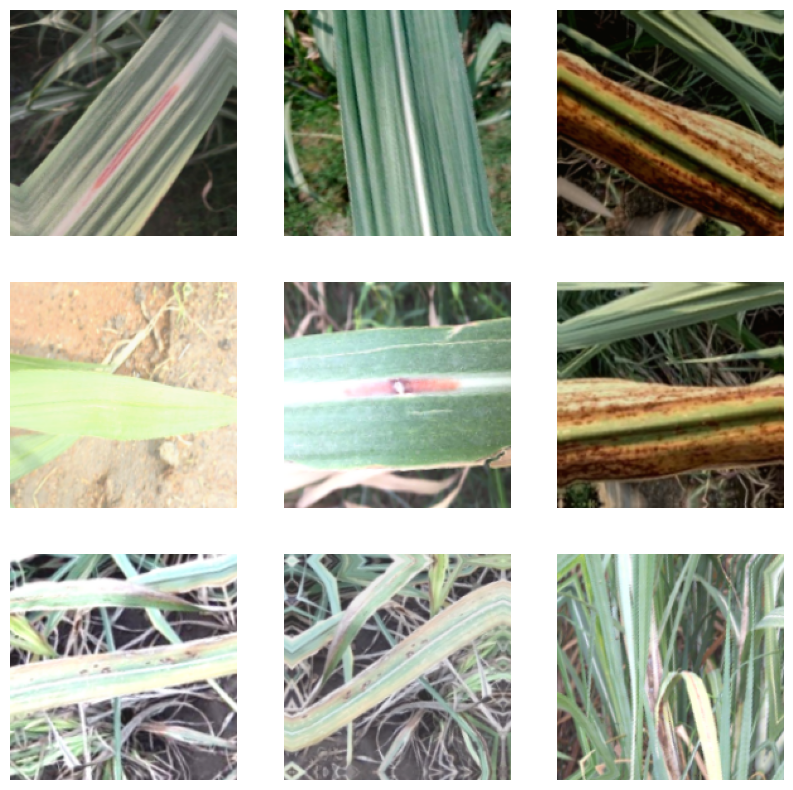

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(X_train)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

Dropout

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.1),
  layers.Conv2D(34, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 34)        4930      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 34)        0         
 g2D)                                                 

In [ ]:
epochs = 70
history = model.fit(
  X_train,
  y_train,validation_data=(X_val, y_val),
  epochs=epochs
)

Epoch 1/70
46/46 [==============================] - 2s 38ms/step - loss: 0.0022 - accuracy: 0.9986 - val_loss: 0.3108 - val_accuracy: 0.9503
Epoch 2/70
46/46 [==============================] - 1s 31ms/step - loss: 0.0034 - accuracy: 0.9979 - val_loss: 0.3445 - val_accuracy: 0.9596
Epoch 3/70
46/46 [==============================] - 1s 29ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.2873 - val_accuracy: 0.9596
Epoch 4/70
46/46 [==============================] - 1s 29ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.4003 - val_accuracy: 0.9472
Epoch 5/70
46/46 [==============================] - 1s 30ms/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.3576 - val_accuracy: 0.9534
Epoch 6/70
46/46 [==============================] - 1s 29ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.3943 - val_accuracy: 0.9379
Epoch 7/70
46/46 [==============================] - 1s 30ms/step - loss: 0.0129 - accuracy: 0.9938 - val_loss: 0.3159 - val_accuracy: 0.9441
Epoch 8/70
46

Visualize training results

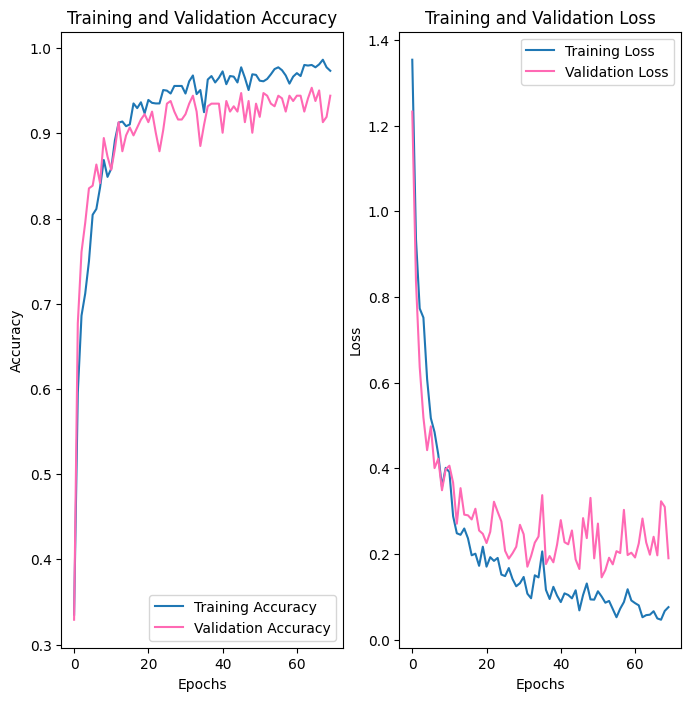

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',color='hotpink')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss',color='hotpink')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predict on new data

In [ ]:
# Evaluate the model on the testing dataset
loss, accuracy = model.evaluate(X_test,y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


10/10 [==============================] - 0s 11ms/step - loss: 0.1309 - accuracy: 0.9746
Test Loss: 0.13085441291332245
Test Accuracy: 0.9746031761169434


In [ ]:
predictions = model.predict(X_test)

10/10 [==============================] - 0s 7ms/step


In [ ]:
y_pred = np.argmax(predictions, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9746031746031746

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1_score = f1_score(y_test, y_pred, average='weighted')


In [ ]:
precision,recall,f1_score

(0.9754902769188484, 0.9746031746031746, 0.9745972110488635)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.95      0.98        88
           2       0.97      0.94      0.96        72
           3       0.99      1.00      0.99        83

    accuracy                           0.97       315
   macro avg       0.97      0.97      0.97       315
weighted avg       0.98      0.97      0.97       315



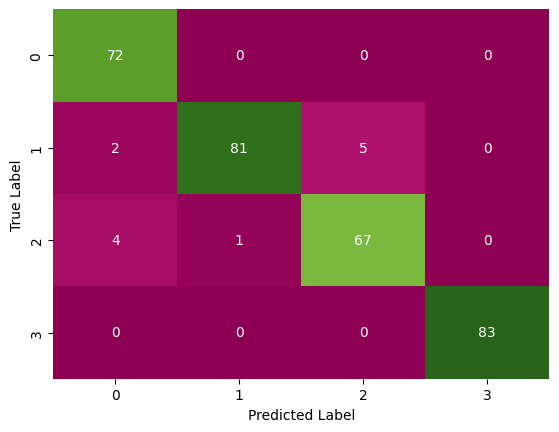

In [ ]:
# Create the confusion matrix heatmap
ax = sns.heatmap(cm, annot=True, cmap='PiYG', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Remove the colorbar
ax.collections[0].colorbar.remove()

# Show the plot
plt.show()


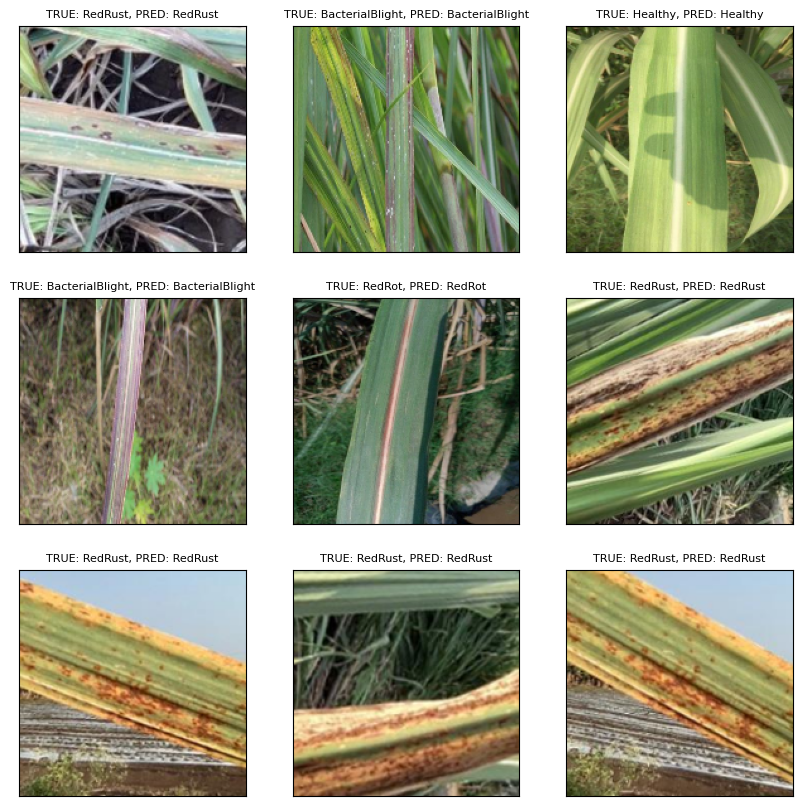

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        n = random.randint(0, len(y_test)-1)  # Adjust the range according to the size of y_test

        # Normalize the image data to [0, 1]
        img = X_test[n]  # Assuming X_test is your test image dataset
        img = img.astype(np.float32) / 255.0

        # Display the image
        ax[i, j].imshow(img)

        # Set axes ticks
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

        # Get the original labels using the label_mapping dictionary
        true_label = label_mapping[y_test[n]]
        pred_label = label_mapping[y_pred[n]]

        # Check if the prediction matches the true label
        if y_test[n] != y_pred[n]:
            ax[i, j].set_title(f"TRUE: {true_label}, PRED: {pred_label}", color="red", fontsize=8)
        else:
            ax[i, j].set_title(f"TRUE: {true_label}, PRED: {pred_label}", color="black", fontsize=8)

#plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()
plt.show()
